# Preparations

In [1]:
import xarray as xr
import numpy as np
import xesmf as xe

import matplotlib.pyplot as plt
import matplotlib.colors
import cartopy.crs as ccrs
import cmocean

# import sys
# sys.path.insert(0,'../pyicon-master/') 
# import pyicon as pyic

In [2]:
%run ./functions.ipynb

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----accessor
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----accessor
-----view
-----quickplots
-----quickplots


In [3]:
### averages over the last 50 years of the experiment and control runs were calculated with CDO ymonmean and timmean
### CDO setgrid was used to incorporate horizontal grid information from the ICON grid files (icon_grid_0030_R02B03_G.nc, icon_grid_0036_R02B04_O.nc).
### Thesewere retrieved from the URLs given in the output data:
### http://icon-downloads.mpimet.mpg.de/grids/public/mpim/0030/icon_grid_0030_R02B03_G.nc  
### http://icon-downloads.mpimet.mpg.de/grids/public/mpim/0036/icon_grid_0036_R02B04_O.nc

In [4]:
ds_atm_2d=xr.open_dataset('./data/sus22F0_atm_2d_ml_last50yrs_setgrid.nc')
ds_atm_2d_ctrl=xr.open_dataset('./data/sus2200_atm_2d_ml_last50yrs_setgrid.nc')
ds_atm_3d=xr.open_dataset('./data/sus22F0_atm_3d_ml_last50yrs_setgrid.nc')
ds_atm_3d_ctrl=xr.open_dataset('./data/sus2200_atm_3d_ml_last50yrs_setgrid.nc')
ds_atm_mon=xr.open_dataset('./data/sus22F0_atm_mon_last50yrs.nc')
ds_atm_mon_ctrl=xr.open_dataset('./data/sus2200_atm_mon_last50yrs.nc')

ds_lnd_ctrl=xr.open_dataset('./data/sus2200_lnd_basic_ml_last50yrs_setgrid.nc')
ds_lnd=xr.open_dataset('./data/sus22F0_lnd_basic_ml_last50yrs_setgrid.nc')

ds_oce=xr.open_dataset('./data/sus22F0_oce_P1M_2d_last50yrs_setgrid.nc')
ds_oce_ctrl=xr.open_dataset('./data/sus2200_oce_P1M_2d_last50yrs_setgrid.nc')
ds_oce_3D_ctrl=xr.open_dataset('./data/sus2200_oce_P1M_3d_last50yrs_setgrid.nc')
ds_oce_sqr_ctrl=xr.open_dataset('./data/sus2200_oce_P1M_sqr_last50yrs_setgrid.nc')
ds_oce_moc_ctrl=xr.open_dataset('./data/sus2200_oce_P1M_moc_last50yrs.nc')
ds_oce_moc=xr.open_dataset('./data/sus22F0_oce_P1M_moc_last50yrs.nc')

ds_hamocc_monitor=xr.open_dataset('./data/sus22F0_hamocc_monitor_last50yrs.nc')
ds_hamocc_monitor_ctrl=xr.open_dataset('./data/sus2200_hamocc_monitor_last50yrs.nc')

# ds_hamocc=xr.open_dataset('./data/sus22F0_hamocc_last50yrs_setgrid.nc')
# ds_hamocc_ctrl=xr.open_dataset('./data/sus2200_hamocc_last50yrs_setgrid.nc')
# ds_hamocc_3d_tendencies=xr.open_dataset('./data/sus22F0_hamocc_3d_tendencies_last50yrs_setgrid.nc')
# ds_hamocc_3d_tendencies_ctrl=xr.open_dataset('./data/sus2200_hamocc_3d_tendencies_last50yrs_setgrid.nc')

grid_atm=xr.open_dataset('./data/icon_grid_0030_R02B03_G.nc')
grid_ocn=xr.open_dataset('./data/icon_grid_0036_R02B04_O.nc')

/home/jan/miniconda3/lib/python3.9/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/jan/miniconda3/lib/python3.9/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/jan/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/home/jan/miniconda3/lib/python3.9/site-packages/xarray/coding/times.py:527: Seri

In [8]:
ds_atm_2d_regrid=regrid_rec(ds_atm_2d)
ds_atm_2d_ctrl_regrid=regrid_rec(ds_atm_2d_ctrl)
ds_atm_3d_ctrl_regrid=regrid_rec(ds_atm_3d_ctrl)



/home/jan/miniconda3/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(
/home/jan/miniconda3/lib/python3.9/site-packages/xesmf/smm.py:98: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


In [109]:
ds_lnd_ctrl_regrid=regrid_rec(ds_lnd_ctrl)
ds_lnd_regrid=regrid_rec(ds_lnd)


/home/jan/miniconda3/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(
/home/jan/miniconda3/lib/python3.9/site-packages/xesmf/smm.py:98: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


In [5]:
ds_oce_ctrl_regrid=regrid_rec(ds_oce_ctrl)
ds_oce_regrid=regrid_rec(ds_oce)


/home/jan/miniconda3/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(
/home/jan/miniconda3/lib/python3.9/site-packages/xesmf/smm.py:98: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


In [5]:
ds_oce_3D_ctrl_regrid=regrid_rec(ds_oce_3D_ctrl)
# ds_oce_3D_ctrl_regrid=regrid_rec(ds_oce_3D_ctrl)

/home/jan/miniconda3/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(
/home/jan/miniconda3/lib/python3.9/site-packages/xesmf/smm.py:98: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


In [3]:
ds_atm_3d_ctrl=xr.open_dataset('./data/sus2200_atm_3d_ml_last50yrs_setgrid.nc')
ds_atm_3d_ctrl_regrid=regrid_rec(ds_atm_3d_ctrl)

/home/jan/miniconda3/lib/python3.9/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/jan/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/home/jan/miniconda3/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(
/home/jan/miniconda3/lib/python3.9/site-packages/xesmf/smm.py:98: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.

# Forcing Scenario: Flat Earth (removed orography)

In [6]:
var=ds_oce_3D_ctrl_regrid.rho.isel(time=0) 
depths=(((var>0)*1)*ds_oce_3D_ctrl_regrid.depth).where(var>0)
depths_seafloor=-1*depths.max(dim='depth')

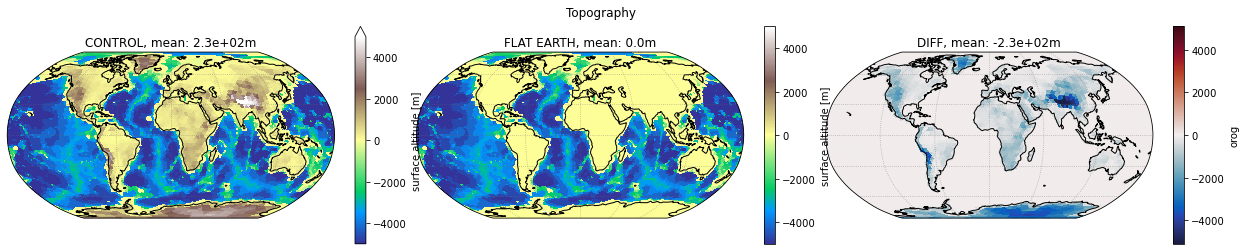

In [16]:
var=ds_atm_2d_regrid.orog
var_ctrl=ds_atm_2d_ctrl_regrid.orog
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
vmin=-5e3
vmax=5e3

fig,axs=plt.subplots(1,3,subplot_kw={'projection': ccrs.Robinson()},figsize=[22,4])
depths_seafloor.plot(ax=axs[0],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='terrain',add_colorbar=False)
var_ctrl.where(var_ctrl>5).plot(ax=axs[0],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='terrain') #,vmin=vmin,vmax=vmax ,cmap=cmocean.cm.matter
depths_seafloor.plot(ax=axs[1],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='terrain',add_colorbar=False)
var.where(var_ctrl>5).plot(ax=axs[1],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='terrain')
var_diff.plot(ax=axs[2],transform=ccrs.PlateCarree(),cmap=cmocean.cm.balance) #,vmin=-4,vmax=4

# colors_undersea = plt.cm.terrain(np.linspace(0.1, 0.11, 2)) #plt.cm.terrain(np.linspace(0, 0.17, 56))
# colors_land = plt.cm.terrain(np.linspace(0.25, 1, 200)) #plt.cm.terrain(np.linspace(0.25, 1, 200))
# colors = np.vstack((colors_undersea, colors_land))
# cut_terrain_map = matplotlib.colors.LinearSegmentedColormap.from_list('cut_terrain', colors)
# fig,axs=plt.subplots(1,3,subplot_kw={'projection': ccrs.Robinson()},figsize=[22,4])
# var_ctrl.plot(ax=axs[0],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap=cut_terrain_map) #,vmin=vmin,vmax=vmax ,cmap=cmocean.cm.matter
# var.plot(ax=axs[1],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap=cut_terrain_map)
# var_diff.plot(ax=axs[2],transform=ccrs.PlateCarree(),cmap=cmocean.cm.balance) #,vmin=-4,vmax=4

for aa in axs:
    aa.coastlines()
    aa.gridlines(color='dimgrey', alpha=0.5, linestyle=':')

weights = np.cos(np.deg2rad(var.lat))
var_mean = float(var.weighted(weights).mean(("lon", "lat")).values)
var_ctrl_mean = float(var_ctrl.weighted(weights).mean(("lon", "lat")).values)
var_diff_mean=float(var_diff.weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL, mean: {:.2}m'.format(var_ctrl_mean))
axs[1].set_title('FLAT EARTH, mean: {:.2}m'.format(var_mean))
axs[2].set_title('DIFF, mean: {:+.2}m'.format(var_diff_mean))

fig.suptitle('Topography',y=0.95)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)



# Climatic Effects

## Surface Temperature

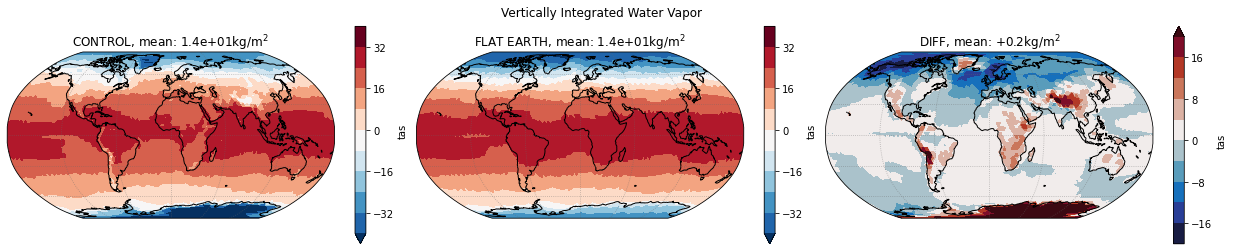

In [19]:
var=ds_atm_2d_regrid.tas.mean('time').isel(height_2=0)-273.15
var_ctrl=ds_atm_2d_ctrl_regrid.tas.mean('time').isel(height_2=0)-273.15
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
vmin=-40
vmax=40

fig,axs=plt.subplots(1,3,subplot_kw={'projection': ccrs.Robinson()},figsize=[22,4])
var_ctrl.plot.contourf(ax=axs[0],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=11) 
var.plot.contourf(ax=axs[1],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=11)
var_diff.plot.contourf(ax=axs[2],transform=ccrs.PlateCarree(),vmin=-20,vmax=20,cmap=cmocean.cm.balance,levels=11) #,vmin=-4,vmax=4

for aa in axs:
    aa.coastlines()
    aa.gridlines(color='dimgrey', alpha=0.5, linestyle=':')

weights = np.cos(np.deg2rad(var.lat))
var_mean = float(var.weighted(weights).mean(("lon", "lat")).values)
var_ctrl_mean = float(var_ctrl.weighted(weights).mean(("lon", "lat")).values)
var_diff_mean=float(var_diff.weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL, mean: {:.2}kg/m$^2$'.format(var_ctrl_mean))
axs[1].set_title('FLAT EARTH, mean: {:.2}kg/m$^2$'.format(var_mean))
axs[2].set_title('DIFF, mean: {:+.2}kg/m$^2$'.format(var_diff_mean))

fig.suptitle('Vertically Integrated Water Vapor', y=0.95)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)



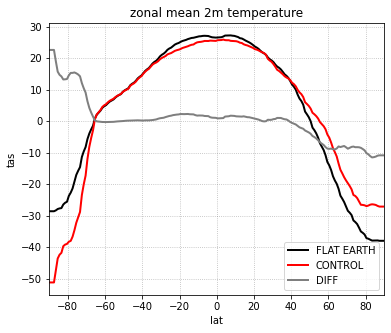

In [21]:
fig,axs=plt.subplots(1,1,figsize=[6,5])
var.mean(dim='lon').plot(ax=axs,c='k',label='FLAT EARTH',lw=2) #,vmin=vmin,vmax=vmax ,cmap=cmocean.cm.matter
var_ctrl.mean(dim='lon').plot(ax=axs,c='r',label='CONTROL',lw=2) #,vmin=vmin,vmax=vmax ,cmap=cmocean.cm.matter
var_diff.mean(dim='lon').plot(ax=axs,c='tab:grey',label='DIFF',lw=2) #,vmin=-1e3,vmax=1e3,cmap='RdBu'

axs.set_xlim([-90,90])
axs.grid(c='dimgrey',ls=':', alpha=0.5)
#axs.gridlines(color='dimgrey', alpha=0.5, linestyle='--')
axs.set_title('zonal mean 2m temperature')

axs.legend()

## Albedo, Clouds, Sea Ice, Snow

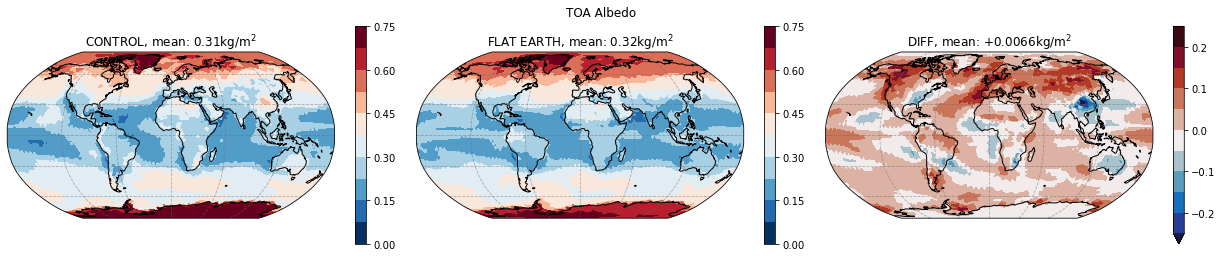

In [11]:
var=(ds_atm_2d_regrid.data_vars['rsut']/ds_atm_2d_regrid.data_vars['rsdt']).mean('time')
var_ctrl=(ds_atm_2d_ctrl_regrid.data_vars['rsut']/ds_atm_2d_ctrl_regrid.data_vars['rsdt']).mean('time') #.mean(dim='time')
# var=ds_atm_2d_regrid.albedo.mean('time')#-273.15
# var_ctrl=ds_atm_2d_ctrl_regrid.albedo.mean('time')#-273.15
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
vmin=0
vmax=0.75

fig,axs=plt.subplots(1,3,subplot_kw={'projection': ccrs.Robinson()},figsize=[22,4])
var_ctrl.plot.contourf(ax=axs[0],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=11) 
var.plot.contourf(ax=axs[1],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=11)
var_diff.plot.contourf(ax=axs[2],transform=ccrs.PlateCarree(),vmin=-0.25,vmax=0.25,cmap=cmocean.cm.balance,levels=11) #,vmin=-4,vmax=4

for aa in axs:
    aa.coastlines()
    aa.gridlines(color='dimgrey', alpha=0.5, linestyle=':')

weights = np.cos(np.deg2rad(var.lat))
var_mean = float(var.weighted(weights).mean(("lon", "lat")).values)
var_ctrl_mean = float(var_ctrl.weighted(weights).mean(("lon", "lat")).values)
var_diff_mean=float(var_diff.weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL, mean: {:.2}kg/m$^2$'.format(var_ctrl_mean))
axs[1].set_title('FLAT EARTH, mean: {:.2}kg/m$^2$'.format(var_mean))
axs[2].set_title('DIFF, mean: {:+.2}kg/m$^2$'.format(var_diff_mean))

fig.suptitle('TOA Albedo', y=0.95)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)



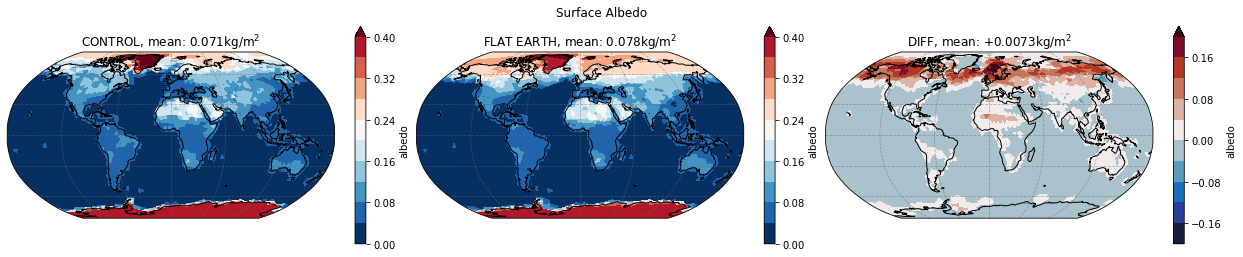

In [12]:
var=ds_atm_2d_regrid.albedo.mean('time')
var_ctrl=ds_atm_2d_ctrl_regrid.albedo.mean('time') 
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
vmin=0
vmax=0.4

fig,axs=plt.subplots(1,3,subplot_kw={'projection': ccrs.Robinson()},figsize=[22,4])
var_ctrl.plot.contourf(ax=axs[0],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=11) 
var.plot.contourf(ax=axs[1],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=11)
var_diff.plot.contourf(ax=axs[2],transform=ccrs.PlateCarree(),vmin=-0.2,vmax=0.2,cmap=cmocean.cm.balance,levels=11) #,vmin=-4,vmax=4

for aa in axs:
    aa.coastlines()
    aa.gridlines(color='dimgrey', alpha=0.5, linestyle=':')

weights = np.cos(np.deg2rad(var.lat))
var_mean = float(var.weighted(weights).mean(("lon", "lat")).values)
var_ctrl_mean = float(var_ctrl.weighted(weights).mean(("lon", "lat")).values)
var_diff_mean=float(var_diff.weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL, mean: {:.2}kg/m$^2$'.format(var_ctrl_mean))
axs[1].set_title('FLAT EARTH, mean: {:.2}kg/m$^2$'.format(var_mean))
axs[2].set_title('DIFF, mean: {:+.2}kg/m$^2$'.format(var_diff_mean))

fig.suptitle('Surface Albedo', y=0.95)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)





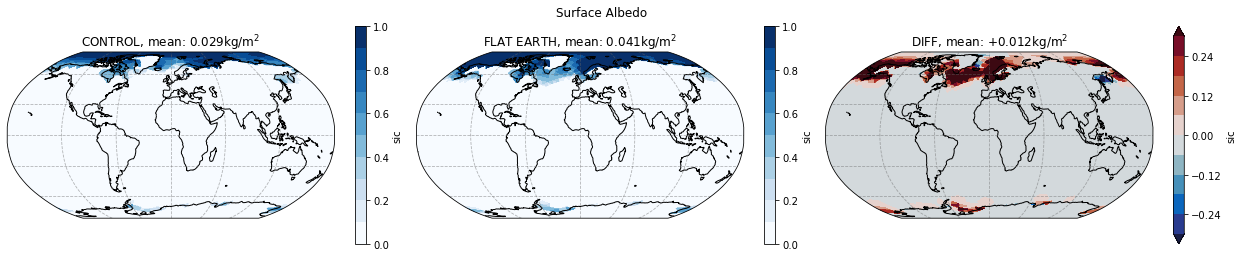

In [13]:
var=ds_atm_2d_regrid.sic.mean('time')
var_ctrl=ds_atm_2d_ctrl_regrid.sic.mean('time') 
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
vmin=0
vmax=1

fig,axs=plt.subplots(1,3,subplot_kw={'projection': ccrs.Robinson()},figsize=[22,4])
var_ctrl.plot.contourf(ax=axs[0],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='Blues',levels=11) 
var.plot.contourf(ax=axs[1],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='Blues',levels=11)
var_diff.plot.contourf(ax=axs[2],transform=ccrs.PlateCarree(),vmin=-0.3,vmax=0.3,cmap=cmocean.cm.balance,levels=11) #,vmin=-4,vmax=4

for aa in axs:
    aa.coastlines()
    aa.gridlines(color='dimgrey', alpha=0.5, linestyle=':')

weights = np.cos(np.deg2rad(var.lat))
var_mean = float(var.weighted(weights).mean(("lon", "lat")).values)
var_ctrl_mean = float(var_ctrl.weighted(weights).mean(("lon", "lat")).values)
var_diff_mean=float(var_diff.weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL, mean: {:.2}kg/m$^2$'.format(var_ctrl_mean))
axs[1].set_title('FLAT EARTH, mean: {:.2}kg/m$^2$'.format(var_mean))
axs[2].set_title('DIFF, mean: {:+.2}kg/m$^2$'.format(var_diff_mean))

fig.suptitle('Surface Albedo', y=0.95)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)





## Atmospheric Circulation, Waves

In [17]:
ds_atm_3d_ctrl_regrid_pressure=height_to_pressure(ds_atm_3d_ctrl.mean('time'))
ds_atm_3d_regrid_pressure=height_to_pressure(ds_atm_3d.mean('time'))

In [162]:
### Zonal anomaly Z* (?) of geopotential height
zg_star_anom_ctrl=ds_atm_3d_ctrl_regrid_pressure.zg-ds_atm_3d_ctrl_regrid_pressure.zg.mean('lon')
zg_star_anom=ds_atm_3d_regrid_pressure.zg-ds_atm_3d_regrid_pressure.zg.mean('lon')


In [157]:

windspeed_ctrl=xr.ufuncs.sqrt((ds_atm_3d_ctrl_regrid_pressure.ua**2+ds_atm_3d_ctrl_regrid_pressure.va**2))
windspeed=xr.ufuncs.sqrt((ds_atm_3d_regrid_pressure.ua**2+ds_atm_3d_regrid_pressure.va**2))

# windspeed_ctrl=ds_atm_3d_ctrl_regrid_pressure.ua
# windspeed=ds_atm_3d_regrid_pressure.ua

# windspeed_ctrl=ds_atm_3d_ctrl_regrid_pressure.ua+ds_atm_3d_ctrl_regrid_pressure.va
# windspeed=ds_atm_3d_regrid_pressure.ua+ds_atm_3d_regrid_pressure.va

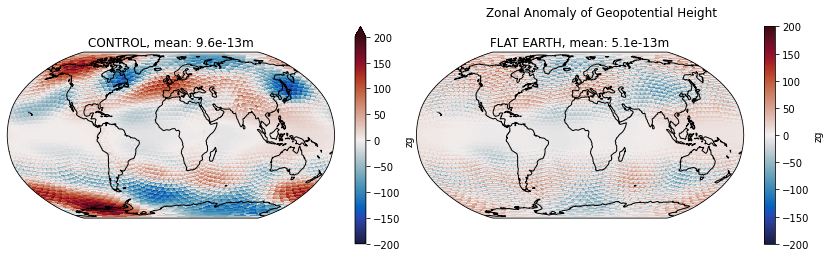

In [164]:
### Stationary Waves, e.g. https://link.springer.com/article/10.1007/s40641-019-00147-6
### google images "atmosphere stationary wave geopotential height"

var=zg_star_anom.sel(plevc=300e2)
var_ctrl=zg_star_anom_ctrl.sel(plevc=300e2)
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
vmin=-200
vmax=-vmin

fig,axs=plt.subplots(1,3,subplot_kw={'projection': ccrs.Robinson()},figsize=[22,4])
axs[2].remove()
var_ctrl.plot(ax=axs[0],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap=cmocean.cm.balance) 

var.plot(ax=axs[1],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap=cmocean.cm.balance)
# var_diff.plot(ax=axs[2],transform=ccrs.PlateCarree(),cmap=cmocean.cm.balance) #,vmin=-4,vmax=4

for aa in axs:
    aa.coastlines()
    aa.gridlines(color='dimgrey', alpha=0.5, linestyle=':')

weights = np.cos(np.deg2rad(var.lat))
var_mean = float(var.weighted(weights).mean(("lon", "lat")).values)
var_ctrl_mean = float(var_ctrl.weighted(weights).mean(("lon", "lat")).values)
var_diff_mean=float(var_diff.weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL, mean: {:.2}m'.format(var_ctrl_mean))
axs[1].set_title('FLAT EARTH, mean: {:.2}m'.format(var_mean))
#axs[2].set_title('DIFF, mean: {:+.2}m'.format(var_diff_mean))

fig.suptitle('Zonal Anomaly of Geopotential Height',y=0.95)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)



/home/jan/miniconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1841: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = self.projection.transform_vectors(t, x, y, u, v)


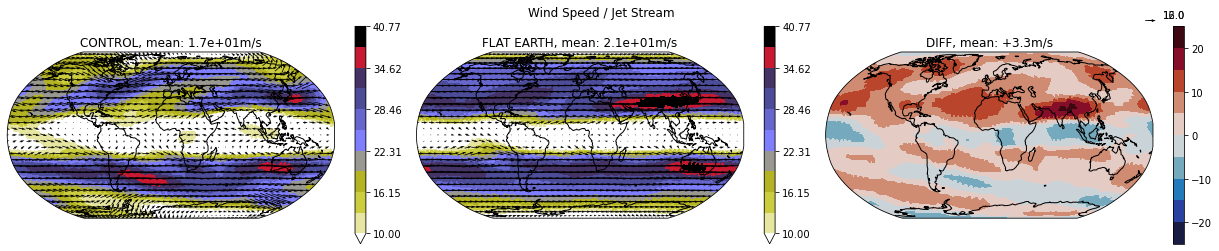

In [160]:
### Stationary Waves, e.g. https://link.springer.com/article/10.1007/s40641-019-00147-6
### google images "atmosphere stationary wave geopotential height"

var=windspeed.sel(plevc=200e2)
var_ctrl=windspeed_ctrl.sel(plevc=200e2)
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
vmin=10
# vmax=-vmin

fig,axs=plt.subplots(1,3,subplot_kw={'projection': ccrs.Robinson()},figsize=[22,4])
#axs[2].remove()
var_ctrl.plot.contourf(ax=axs[0],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='gist_stern_r',levels=11) 
var.plot.contourf(ax=axs[1],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='gist_stern_r',levels=11)
var_diff.plot.contourf(ax=axs[2],transform=ccrs.PlateCarree(),cmap=cmocean.cm.balance,levels=11) #,vmin=-4,vmax=4

ds_atm_3d_ctrl_regrid_pressure.isel(lon=slice(0,360,8),lat=slice(0,180,6)).sel(plevc=200e2).plot.quiver(x='lon',y='lat',u='ua',v='va',scale=5e2,ax=axs[0],transform=ccrs.PlateCarree())
ds_atm_3d_regrid_pressure.isel(lon=slice(0,360,8),lat=slice(0,180,6)).sel(plevc=200e2).plot.quiver(x='lon',y='lat',u='ua',v='va',scale=5e2,ax=axs[1],transform=ccrs.PlateCarree())
# ds_diff=ds_atm_3d_regrid_pressure-ds_atm_3d_ctrl_regrid_pressure
# ds_diff.isel(lon=slice(0,360,8),lat=slice(0,180,6)).sel(plevc=250e2).plot.quiver(x='lon',y='lat',u='ua',v='va',scale=5e2,ax=axs[2],transform=ccrs.PlateCarree())

for aa in axs:
    aa.coastlines()
    aa.gridlines(color='dimgrey', alpha=0.5, linestyle=':')

weights = np.cos(np.deg2rad(var.lat))
var_mean = float(var.weighted(weights).mean(("lon", "lat")).values)
var_ctrl_mean = float(var_ctrl.weighted(weights).mean(("lon", "lat")).values)
var_diff_mean=float(var_diff.weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL, mean: {:.2}m/s'.format(var_ctrl_mean))
axs[1].set_title('FLAT EARTH, mean: {:.2}m/s'.format(var_mean))
axs[2].set_title('DIFF, mean: {:+.2}m/s'.format(var_diff_mean))

fig.suptitle('Wind Speed / Jet Stream', y=0.95)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)



In [ ]:
psi_ctrl=overturning_atm(ds_atm_3d_ctrl_regrid_pressure)
psi=overturning_atm(ds_atm_3d_regrid_pressure)

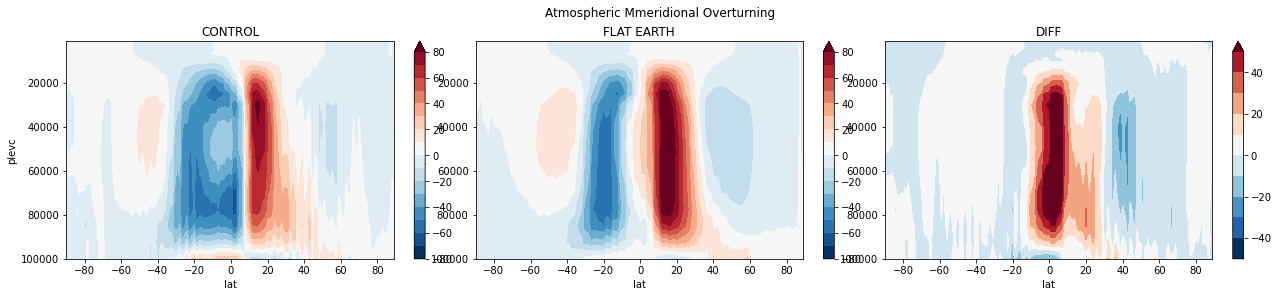

In [131]:

var=psi
var_ctrl=psi_ctrl
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
vmin=-80
vmax=-vmin
nlevs=int((vmax-vmin)/10+1)

fig,axs=plt.subplots(1,3,figsize=[22,4]) #,subplot_kw={'projection': ccrs.Robinson()}
#axs[2].remove()
var_ctrl.plot.contourf(ax=axs[0],vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=nlevs,x='lat',y='plevc') #,transform=ccrs.PlateCarree()
var.plot.contourf(ax=axs[1],vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=nlevs,x='lat',y='plevc')
var_diff.plot.contourf(ax=axs[2],cmap='RdBu_r',vmin=-50,vmax=50,levels=11,x='lat',y='plevc') #,vmin=-4,vmax=4

for aa in axs:
    aa.invert_yaxis()
    aa.grid(c='dimgrey',ls=':', alpha=0.5)

# weights = np.cos(np.deg2rad(var.lat))
# var_mean = float(var.weighted(weights).mean(("lon", "lat")).values)
# var_ctrl_mean = float(var_ctrl.weighted(weights).mean(("lon", "lat")).values)
# var_diff_mean=float(var_diff.weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL')
axs[1].set_title('FLAT EARTH')
axs[2].set_title('DIFF')

fig.suptitle('Atmospheric Meridional Overturning Streamfunction', y=1)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)



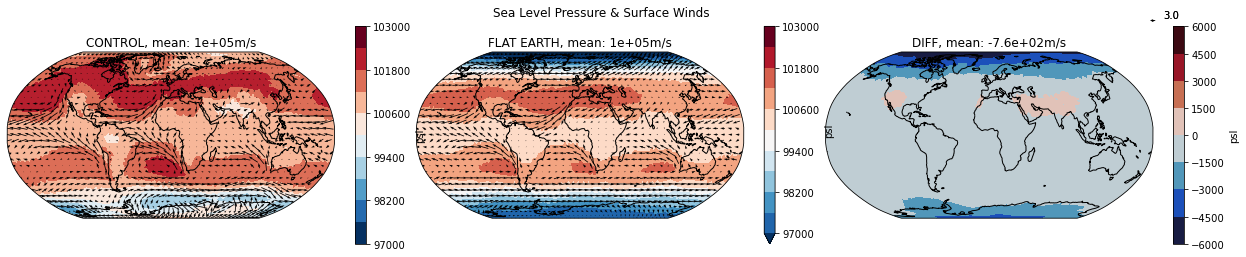

In [154]:


var=ds_atm_2d_regrid.psl.mean('time')
var_ctrl=ds_atm_2d_ctrl_regrid.psl.mean('time')
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
vmin=970e2
vmax=1030e2
# vmax=-vmin

fig,axs=plt.subplots(1,3,subplot_kw={'projection': ccrs.Robinson()},figsize=[22,4])
#axs[2].remove()
var_ctrl.plot.contourf(ax=axs[0],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=11) 
var.plot.contourf(ax=axs[1],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=11)
var_diff.plot.contourf(ax=axs[2],transform=ccrs.PlateCarree(),cmap=cmocean.cm.balance,levels=11) #,vmin=-4,vmax=4

ds_atm_2d_ctrl_regrid.mean('time').isel(height=0,lon=slice(0,360,8),lat=slice(0,180,6)).plot.quiver(x='lon',y='lat',u='uas',v='vas',scale=2e2,ax=axs[0],transform=ccrs.PlateCarree())
ds_atm_2d_regrid.mean('time').isel(height=0,lon=slice(0,360,8),lat=slice(0,180,6)).plot.quiver(x='lon',y='lat',u='uas',v='vas',scale=2e2,ax=axs[1],transform=ccrs.PlateCarree())
# ds_diff=ds_atm_3d_regrid_pressure-ds_atm_3d_ctrl_regrid_pressure
# ds_diff.isel(lon=slice(0,360,8),lat=slice(0,180,6)).sel(plevc=250e2).plot.quiver(x='lon',y='lat',u='ua',v='va',scale=5e2,ax=axs[2],transform=ccrs.PlateCarree())

for aa in axs:
    aa.coastlines()
    aa.gridlines(color='dimgrey', alpha=0.5, linestyle=':')

weights = np.cos(np.deg2rad(var.lat))
var_mean = float(var.weighted(weights).mean(("lon", "lat")).values)
var_ctrl_mean = float(var_ctrl.weighted(weights).mean(("lon", "lat")).values)
var_diff_mean=float(var_diff.weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL, mean: {:.2}m/s'.format(var_ctrl_mean))
axs[1].set_title('FLAT EARTH, mean: {:.2}m/s'.format(var_mean))
axs[2].set_title('DIFF, mean: {:+.2}m/s'.format(var_diff_mean))

fig.suptitle('Sea Level Pressure & Surface Winds', y=0.95)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)



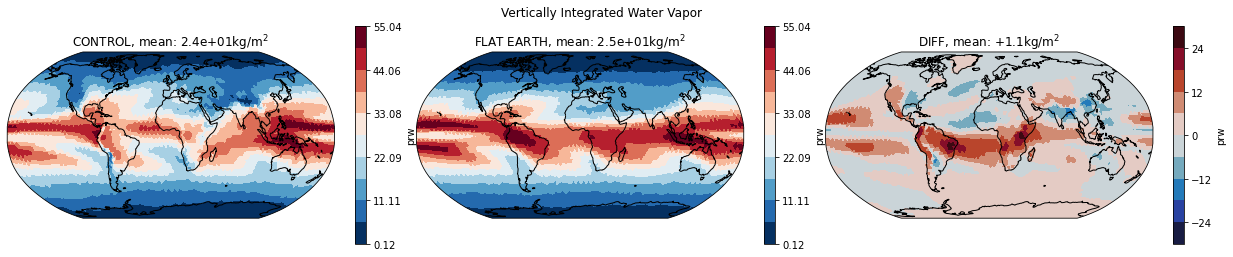

In [155]:


var=ds_atm_2d_regrid.prw.mean('time')
var_ctrl=ds_atm_2d_ctrl_regrid.prw.mean('time')
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
# vmin=970e2
# vmax=1030e2
# vmax=-vmin

fig,axs=plt.subplots(1,3,subplot_kw={'projection': ccrs.Robinson()},figsize=[22,4])
#axs[2].remove()
var_ctrl.plot.contourf(ax=axs[0],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=11) 
var.plot.contourf(ax=axs[1],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=11)
var_diff.plot.contourf(ax=axs[2],transform=ccrs.PlateCarree(),cmap=cmocean.cm.balance,levels=11) #,vmin=-4,vmax=4

# ds_atm_2d_ctrl_regrid.mean('time').isel(height=0,lon=slice(0,360,8),lat=slice(0,180,6)).plot.quiver(x='lon',y='lat',u='uas',v='vas',scale=2e2,ax=axs[0],transform=ccrs.PlateCarree())
# ds_atm_2d_regrid.mean('time').isel(height=0,lon=slice(0,360,8),lat=slice(0,180,6)).plot.quiver(x='lon',y='lat',u='uas',v='vas',scale=2e2,ax=axs[1],transform=ccrs.PlateCarree())
# # ds_diff=ds_atm_3d_regrid_pressure-ds_atm_3d_ctrl_regrid_pressure
# # ds_diff.isel(lon=slice(0,360,8),lat=slice(0,180,6)).sel(plevc=250e2).plot.quiver(x='lon',y='lat',u='ua',v='va',scale=5e2,ax=axs[2],transform=ccrs.PlateCarree())

for aa in axs:
    aa.coastlines()
    aa.gridlines(color='dimgrey', alpha=0.5, linestyle=':')

weights = np.cos(np.deg2rad(var.lat))
var_mean = float(var.weighted(weights).mean(("lon", "lat")).values)
var_ctrl_mean = float(var_ctrl.weighted(weights).mean(("lon", "lat")).values)
var_diff_mean=float(var_diff.weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL, mean: {:.2}kg/m$^2$'.format(var_ctrl_mean))
axs[1].set_title('FLAT EARTH, mean: {:.2}kg/m$^2$'.format(var_mean))
axs[2].set_title('DIFF, mean: {:+.2}kg/m$^2$'.format(var_diff_mean))

fig.suptitle('Vertically Integrated Water Vapor', y=0.95)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)



## Ocean salinity, Overturning

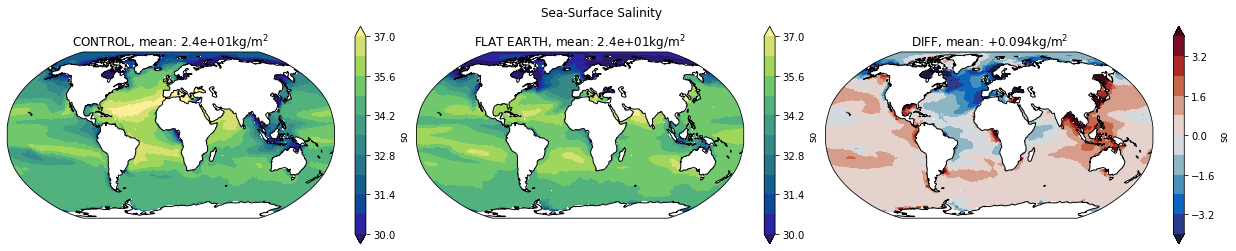

In [14]:
varname='so'
var=ds_oce_regrid.data_vars[varname].isel(depth=0).mean('time')
var_ctrl=ds_oce_ctrl_regrid.data_vars[varname].isel(depth=0).mean('time')
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
vmin=30
vmax=37

fig,axs=plt.subplots(1,3,subplot_kw={'projection': ccrs.Robinson()},figsize=[22,4],num=2)
var_ctrl.where(var_ctrl!=0).plot.contourf(ax=axs[0],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap=cmocean.cm.haline,levels=11) 
var.where(var!=0).plot.contourf(ax=axs[1],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap=cmocean.cm.haline,levels=11)
var_diff.where(var!=0).plot.contourf(ax=axs[2],transform=ccrs.PlateCarree(),vmin=-4,vmax=4,cmap=cmocean.cm.balance,levels=11) #,vmin=-4,vmax=4

for aa in axs:
    aa.coastlines()
    aa.gridlines(color='dimgrey', alpha=0.5, linestyle=':')

weights = np.cos(np.deg2rad(var.lat))
var_mean = float(var.weighted(weights).mean(("lon", "lat")).values)
var_ctrl_mean = float(var_ctrl.weighted(weights).mean(("lon", "lat")).values)
var_diff_mean=float(var_diff.weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL, mean: {:.2}kg/m$^2$'.format(var_ctrl_mean))
axs[1].set_title('FLAT EARTH, mean: {:.2}kg/m$^2$'.format(var_mean))
axs[2].set_title('DIFF, mean: {:+.2}kg/m$^2$'.format(var_diff_mean))

fig.suptitle('Sea-Surface Salinity', y=0.95)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)

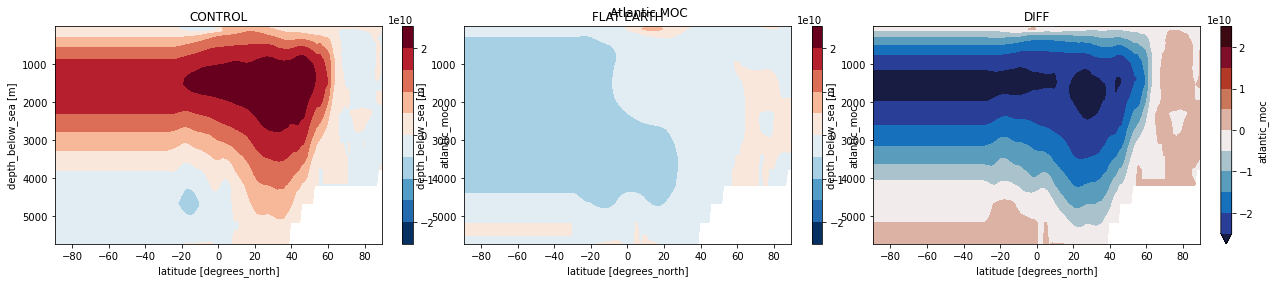

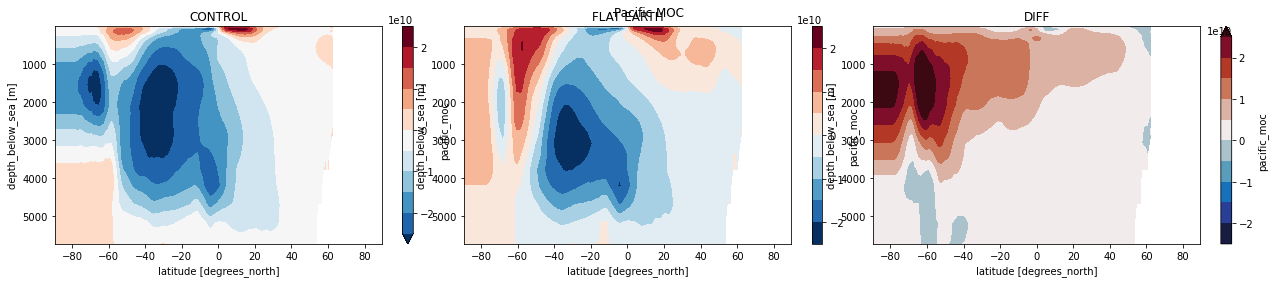

In [34]:
varname='atlantic_moc'
var=ds_oce_moc.data_vars[varname].isel(lon=0).mean('time')#*1e-6 # Sverdrup
var_ctrl=ds_oce_moc_ctrl.data_vars[varname].isel(lon=0).mean('time')#*1e-6
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
vmin=-25e9
vmax=25e9

fig,axs=plt.subplots(1,3,figsize=[22,4],num=1) #,subplot_kw={'projection': ccrs.Robinson()}
var_ctrl.where(var_ctrl!=0).plot.contourf(ax=axs[0],vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=11) #,transform=ccrs.PlateCarree()
var.where(var!=0).plot.contourf(ax=axs[1],vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=11)
var_diff.where(var!=0).plot.contourf(ax=axs[2],vmin=vmin,vmax=vmax,cmap=cmocean.cm.balance,levels=11) #,vmin=-4,vmax=4

for aa in axs:
    aa.invert_yaxis()

# weights = np.cos(np.deg2rad(var.lat))
# var_mean = float(var.weighted(weights).mean(("lon", "lat")).values)
# var_ctrl_mean = float(var_ctrl.weighted(weights).mean(("lon", "lat")).values)
# var_diff_mean=float(var_diff.weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL')
axs[1].set_title('FLAT EARTH')
axs[2].set_title('DIFF')

fig.suptitle('Atlantic MOC', y=0.95)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)



varname='pacific_moc'
var=ds_oce_moc.data_vars[varname].isel(lon=0).mean('time')#*1e-6 # Sverdrup
var_ctrl=ds_oce_moc_ctrl.data_vars[varname].isel(lon=0).mean('time')#*1e-6
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
vmin=-25e9
vmax=25e9

fig,axs=plt.subplots(1,3,figsize=[22,4],num=2) #,subplot_kw={'projection': ccrs.Robinson()}
var_ctrl.where(var_ctrl!=0).plot.contourf(ax=axs[0],vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=11) #,transform=ccrs.PlateCarree()
var.where(var!=0).plot.contourf(ax=axs[1],vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=11)
var_diff.where(var!=0).plot.contourf(ax=axs[2],vmin=vmin,vmax=vmax,cmap=cmocean.cm.balance,levels=11) #,vmin=-4,vmax=4

for aa in axs:
    aa.invert_yaxis()
    aa.grid(c='dimgrey',ls=':', alpha=0.5)

# weights = np.cos(np.deg2rad(var.lat))
# var_mean = float(var.weighted(weights).mean(("lon", "lat")).values)
# var_ctrl_mean = float(var_ctrl.weighted(weights).mean(("lon", "lat")).values)
# var_diff_mean=float(var_diff.weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL')
axs[1].set_title('FLAT EARTH')
axs[2].set_title('DIFF')

fig.suptitle('Pacific MOC', y=0.95)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)

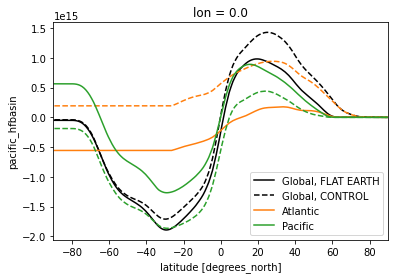

In [9]:
fig,ax=plt.subplots(1,1)

ds_oce_moc.global_hfbasin.mean(dim='time').plot(ax=ax,c='k',label='Global, FLAT EARTH')
ds_oce_moc_ctrl.global_hfbasin.mean(dim='time').plot(ax=ax,c='k',ls='--',label='Global, CONTROL')

ds_oce_moc_ctrl.atlantic_hfbasin.mean(dim='time').plot(ax=ax,c='tab:orange',ls='--')
ds_oce_moc.atlantic_hfbasin.mean(dim='time').plot(ax=ax,c='tab:orange',label='Atlantic')

ds_oce_moc_ctrl.pacific_hfbasin.mean(dim='time').plot(ax=ax,c='tab:green',ls='--')
ds_oce_moc.pacific_hfbasin.mean(dim='time').plot(ax=ax,c='tab:green',label='Pacific')

ax.set_xlim([-90,90])
ax.grid(c='dimgrey',ls=':', alpha=0.5)

ax.legend()

## Precipitation, Vegetation

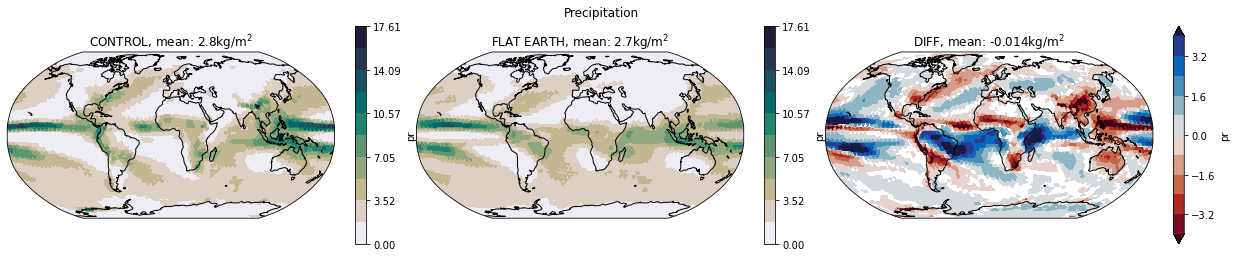

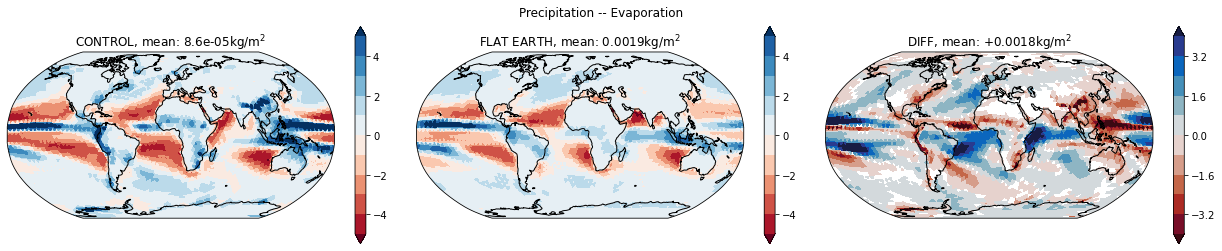

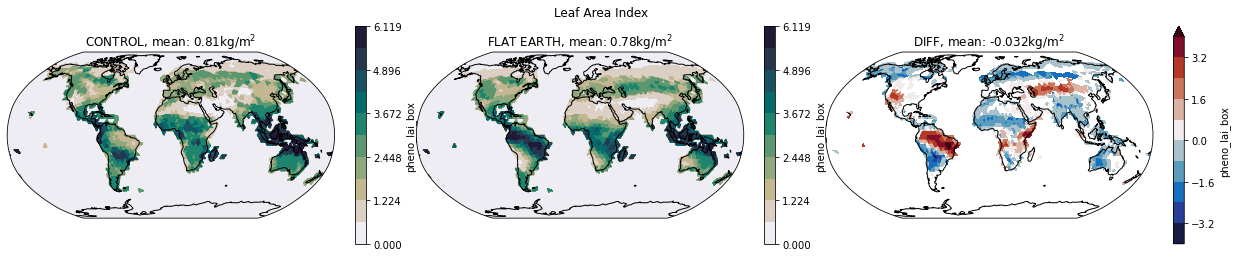

In [137]:
var=ds_atm_2d_regrid.pr.mean('time')*60*60*24
var_ctrl=ds_atm_2d_ctrl_regrid.pr.mean('time')*60*60*24
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
# vmin=0
# vmax=1

fig,axs=plt.subplots(1,3,subplot_kw={'projection': ccrs.Robinson()},figsize=[22,4],num=1)
var_ctrl.plot.contourf(ax=axs[0],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap=cmocean.cm.rain,levels=11) 
var.plot.contourf(ax=axs[1],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap=cmocean.cm.rain,levels=11)
var_diff.where(xr.ufuncs.fabs(var_diff)>0.2).plot.contourf(ax=axs[2],transform=ccrs.PlateCarree(),vmin=-4,vmax=4,cmap=cmocean.cm.balance_r,levels=11) #,vmin=-4,vmax=4

for aa in axs:
    aa.coastlines()
    aa.gridlines(color='dimgrey', alpha=0.5, linestyle=':')

weights = np.cos(np.deg2rad(var.lat))
var_mean = float(var.weighted(weights).mean(("lon", "lat")).values)
var_ctrl_mean = float(var_ctrl.weighted(weights).mean(("lon", "lat")).values)
var_diff_mean=float(var_diff.weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL, mean: {:.2}kg/m$^2$'.format(var_ctrl_mean))
axs[1].set_title('FLAT EARTH, mean: {:.2}kg/m$^2$'.format(var_mean))
axs[2].set_title('DIFF, mean: {:+.2}kg/m$^2$'.format(var_diff_mean))

fig.suptitle('Precipitation', y=0.95)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)




var=(ds_atm_2d_regrid.pr+ds_atm_2d_regrid.evspsbl).mean('time')*60*60*24
var_ctrl=(ds_atm_2d_ctrl_regrid.pr+ds_atm_2d_ctrl_regrid.evspsbl).mean('time')*60*60*24
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
vmin=-5
vmax=-vmin

fig,axs=plt.subplots(1,3,subplot_kw={'projection': ccrs.Robinson()},figsize=[22,4],num=2)
var_ctrl.plot.contourf(ax=axs[0],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='RdBu',levels=11) 
var.plot.contourf(ax=axs[1],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='RdBu',levels=11)
var_diff.where(xr.ufuncs.fabs(var_diff)>0.1).plot.contourf(ax=axs[2],transform=ccrs.PlateCarree(),vmin=-4,vmax=4,cmap=cmocean.cm.balance_r,levels=11) #,vmin=-4,vmax=4

for aa in axs:
    aa.coastlines()
    aa.gridlines(color='dimgrey', alpha=0.5, linestyle=':')

weights = np.cos(np.deg2rad(var.lat))
var_mean = float(var.weighted(weights).mean(("lon", "lat")).values)
var_ctrl_mean = float(var_ctrl.weighted(weights).mean(("lon", "lat")).values)
var_diff_mean=float(var_diff.weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL, mean: {:.2}kg/m$^2$'.format(var_ctrl_mean))
axs[1].set_title('FLAT EARTH, mean: {:.2}kg/m$^2$'.format(var_mean))
axs[2].set_title('DIFF, mean: {:+.2}kg/m$^2$'.format(var_diff_mean))

fig.suptitle('Precipitation -- Evaporation', y=0.95)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)





varname='pheno_lai_box'
var=ds_lnd_regrid.data_vars[varname].mean('time')
var_ctrl=ds_lnd_ctrl_regrid.data_vars[varname].mean('time')
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
# vmin=0
# vmax=1

fig,axs=plt.subplots(1,3,subplot_kw={'projection': ccrs.Robinson()},figsize=[22,4],num=3)
var_ctrl.plot.contourf(ax=axs[0],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap=cmocean.cm.rain,levels=11) 
var.plot.contourf(ax=axs[1],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap=cmocean.cm.rain,levels=11)
var_diff.where(xr.ufuncs.fabs(var_diff)>0.2).plot.contourf(ax=axs[2],transform=ccrs.PlateCarree(),vmin=-4,vmax=+4,cmap=cmocean.cm.balance,levels=11) #,vmin=-4,vmax=4

for aa in axs:
    aa.coastlines()
    aa.set_extent((-180.1,180.1,-90.1,90),crs=ccrs.PlateCarree())
    aa.gridlines(color='dimgrey', alpha=0.5, linestyle=':')

weights = np.cos(np.deg2rad(var.lat))
var_mean = float(var.weighted(weights).mean(("lon", "lat")).values)
var_ctrl_mean = float(var_ctrl.weighted(weights).mean(("lon", "lat")).values)
var_diff_mean=float(var_diff.weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL, mean: {:.2}kg/m$^2$'.format(var_ctrl_mean))
axs[1].set_title('FLAT EARTH, mean: {:.2}kg/m$^2$'.format(var_mean))
axs[2].set_title('DIFF, mean: {:+.2}kg/m$^2$'.format(var_diff_mean))

fig.suptitle('Leaf Area Index', y=0.95)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)



## Asian Monsoon

In [151]:
### Calculate the seasonal mean precipitation, here for May-September (MJJAS) and November-March (NDJFM)
prc_MJJAS=ds_atm_2d_regrid.pr.isel(time=np.arange(4,8+1,1)).mean(dim='time')*60*60*24
prc_NDJFM=ds_atm_2d_regrid.pr.isel(time=[10,11,0,1,2]).mean(dim='time')*60*60*24

### Set the minimum seasonal precipitation difference for a monsoonal climate to 2.5 mm/day
PRC_monsoon_crit=2.5

### Determine where the monsoon condition is fulfilled on the northern/southern hemisphere
condi_monsoon_NH=((((prc_MJJAS-prc_NDJFM)>=PRC_monsoon_crit).where(ds_atm_2d_regrid.lat>=0))==1)
condi_monsoon_SH=((((prc_MJJAS-prc_NDJFM)<=-PRC_monsoon_crit).where(ds_atm_2d_regrid.lat<=0))==1)

### Calculate the seasonal mean precipitation, here for May-September (MJJAS) and November-March (NDJFM)
prc_MJJAS_ctrl=ds_atm_2d_ctrl_regrid.pr.isel(time=np.arange(4,8+1,1)).mean(dim='time')*60*60*24
prc_NDJFM_ctrl=ds_atm_2d_ctrl_regrid.pr.isel(time=[10,11,0,1,2]).mean(dim='time')*60*60*24

### Set the minimum seasonal precipitation difference for a monsoonal climate to 2.5 mm/day
PRC_monsoon_crit=2.5

### Determine where the monsoon condition is fulfilled on the northern/southern hemisphere
condi_monsoon_NH_ctrl=((((prc_MJJAS_ctrl-prc_NDJFM_ctrl)>=PRC_monsoon_crit).where(ds_atm_2d_ctrl_regrid.lat>=0))==1)
condi_monsoon_SH_ctrl=((((prc_MJJAS_ctrl-prc_NDJFM_ctrl)<=-PRC_monsoon_crit).where(ds_atm_2d_ctrl_regrid.lat<=0))==1)

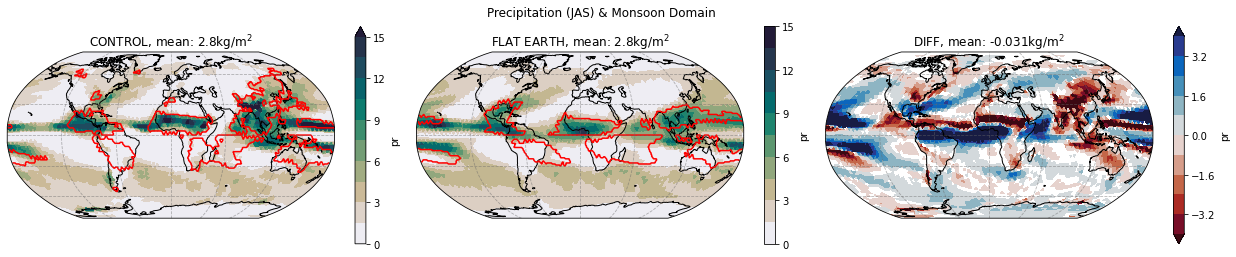

In [154]:
var=ds_atm_2d_regrid.pr.isel(time=[6,7,8]).mean('time')*60*60*24
var_ctrl=ds_atm_2d_ctrl_regrid.pr.isel(time=[6,7,8]).mean('time')*60*60*24
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
vmin=0
vmax=15

fig,axs=plt.subplots(1,3,subplot_kw={'projection': ccrs.Robinson()},figsize=[22,4],num=1)
var_ctrl.plot.contourf(ax=axs[0],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap=cmocean.cm.rain,levels=11) 
var.plot.contourf(ax=axs[1],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap=cmocean.cm.rain,levels=11)
var_diff.where(xr.ufuncs.fabs(var_diff)>0.2).plot.contourf(ax=axs[2],transform=ccrs.PlateCarree(),vmin=-4,vmax=4,cmap=cmocean.cm.balance_r,levels=11) #,vmin=-4,vmax=4

for aa in axs:
    aa.coastlines()
    aa.gridlines(color='dimgrey', alpha=0.5, linestyle='--') 
    
condi_monsoon_NH.plot.contour(ax=axs[1],transform=ccrs.PlateCarree(),colors='r',levels=[0.5])
condi_monsoon_SH.plot.contour(ax=axs[1],transform=ccrs.PlateCarree(),colors='r',levels=[0.5])
condi_monsoon_NH_ctrl.plot.contour(ax=axs[0],transform=ccrs.PlateCarree(),colors='r',levels=[0.5])
condi_monsoon_SH_ctrl.plot.contour(ax=axs[0],transform=ccrs.PlateCarree(),colors='r',levels=[0.5])

weights = np.cos(np.deg2rad(var.lat))
var_mean = float(var.weighted(weights).mean(("lon", "lat")).values)
var_ctrl_mean = float(var_ctrl.weighted(weights).mean(("lon", "lat")).values)
var_diff_mean=float(var_diff.weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL, mean: {:.2}kg/m$^2$'.format(var_ctrl_mean))
axs[1].set_title('FLAT EARTH, mean: {:.2}kg/m$^2$'.format(var_mean))
axs[2].set_title('DIFF, mean: {:+.2}kg/m$^2$'.format(var_diff_mean))
 
fig.suptitle('Precipitation (JAS) & Monsoon Domain', y=0.95)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)

Indian monsoon vanished, Asian monsoon strongly reduced, West African monsoon weakened and shifted southwards. 

## CO$_2$

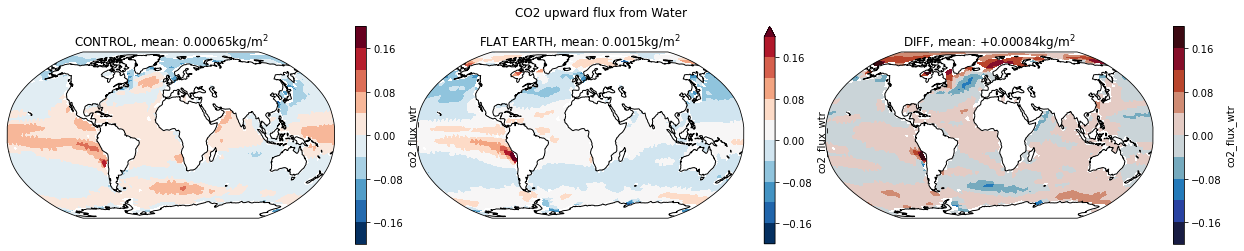

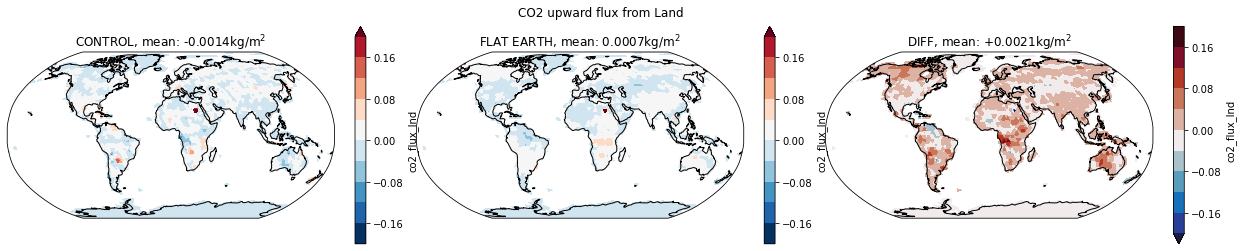

In [106]:
varname='co2_flux_wtr'
var=ds_atm_2d_regrid.data_vars[varname].mean('time')*60*60*24*365 # per year
var_ctrl=ds_atm_2d_ctrl_regrid.data_vars[varname].mean('time')*60*60*24*365
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
vmin=-0.2
# vmax=1030e2
vmax=-vmin

fig,axs=plt.subplots(1,3,subplot_kw={'projection': ccrs.Robinson()},figsize=[22,4],num=1)
#axs[2].remove()
var_ctrl.where(ds_atm_2d_ctrl_regrid.orog<5).plot.contourf(ax=axs[0],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=11) 
var.where(ds_atm_2d_ctrl_regrid.orog<5).plot.contourf(ax=axs[1],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=11)
var_diff.where(ds_atm_2d_ctrl_regrid.orog<5).plot.contourf(ax=axs[2],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap=cmocean.cm.balance,levels=11) #,vmin=-4,vmax=4

# ds_atm_2d_ctrl_regrid.mean('time').isel(height=0,lon=slice(0,360,8),lat=slice(0,180,6)).plot.quiver(x='lon',y='lat',u='uas',v='vas',scale=2e2,ax=axs[0],transform=ccrs.PlateCarree())
# ds_atm_2d_regrid.mean('time').isel(height=0,lon=slice(0,360,8),lat=slice(0,180,6)).plot.quiver(x='lon',y='lat',u='uas',v='vas',scale=2e2,ax=axs[1],transform=ccrs.PlateCarree())
# # ds_diff=ds_atm_3d_regrid_pressure-ds_atm_3d_ctrl_regrid_pressure
# # ds_diff.isel(lon=slice(0,360,8),lat=slice(0,180,6)).sel(plevc=250e2).plot.quiver(x='lon',y='lat',u='ua',v='va',scale=5e2,ax=axs[2],transform=ccrs.PlateCarree())

for aa in axs:
    aa.coastlines()
    aa.gridlines(color='dimgrey', alpha=0.5, linestyle=':')

weights = np.cos(np.deg2rad(var.lat))
var_mean = float(var.where(ds_atm_2d_ctrl_regrid.orog<5).weighted(weights).mean(("lon", "lat")).values)
var_ctrl_mean = float(var_ctrl.where(ds_atm_2d_ctrl_regrid.orog<5).weighted(weights).mean(("lon", "lat")).values)
var_diff_mean=float(var_diff.where(ds_atm_2d_ctrl_regrid.orog<5).weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL, mean: {:.2}kg/m$^2$'.format(var_ctrl_mean))
axs[1].set_title('FLAT EARTH, mean: {:.2}kg/m$^2$'.format(var_mean))
axs[2].set_title('DIFF, mean: {:+.2}kg/m$^2$'.format(var_diff_mean))

fig.suptitle('CO2 upward flux from Water', y=0.95)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)

varname='co2_flux_lnd'
var=ds_atm_2d_regrid.data_vars[varname].mean('time')*60*60*24*365 # per year
var_ctrl=ds_atm_2d_ctrl_regrid.data_vars[varname].mean('time')*60*60*24*365
var_diff=(var-var_ctrl)

vmin=np.min([var.min(),var_ctrl.min()])
vmax=np.max([var.max(),var_ctrl.max()])
vmin=-0.2
# vmax=1030e2
vmax=-vmin

fig,axs=plt.subplots(1,3,subplot_kw={'projection': ccrs.Robinson()},figsize=[22,4],num=2)
#axs[2].remove()
var_ctrl.where(ds_atm_2d_ctrl_regrid.orog>5).plot.contourf(ax=axs[0],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=11) 
var.where(ds_atm_2d_ctrl_regrid.orog>5).plot.contourf(ax=axs[1],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap='RdBu_r',levels=11)
var_diff.where(ds_atm_2d_ctrl_regrid.orog>5).plot.contourf(ax=axs[2],transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap=cmocean.cm.balance,levels=11) #,vmin=-4,vmax=4

# ds_atm_2d_ctrl_regrid.mean('time').isel(height=0,lon=slice(0,360,8),lat=slice(0,180,6)).plot.quiver(x='lon',y='lat',u='uas',v='vas',scale=2e2,ax=axs[0],transform=ccrs.PlateCarree())
# ds_atm_2d_regrid.mean('time').isel(height=0,lon=slice(0,360,8),lat=slice(0,180,6)).plot.quiver(x='lon',y='lat',u='uas',v='vas',scale=2e2,ax=axs[1],transform=ccrs.PlateCarree())
# # ds_diff=ds_atm_3d_regrid_pressure-ds_atm_3d_ctrl_regrid_pressure
# # ds_diff.isel(lon=slice(0,360,8),lat=slice(0,180,6)).sel(plevc=250e2).plot.quiver(x='lon',y='lat',u='ua',v='va',scale=5e2,ax=axs[2],transform=ccrs.PlateCarree())

for aa in axs:
    aa.coastlines()
    aa.gridlines(color='dimgrey', alpha=0.5, linestyle=':')

weights = np.cos(np.deg2rad(var.lat))
var_mean = float(var.where(ds_atm_2d_ctrl_regrid.orog>5).weighted(weights).mean(("lon", "lat")).values)
var_ctrl_mean = float(var_ctrl.where(ds_atm_2d_ctrl_regrid.orog>5).weighted(weights).mean(("lon", "lat")).values)
var_diff_mean=float(var_diff.where(ds_atm_2d_ctrl_regrid.orog>5).weighted(weights).mean(("lon", "lat")).values)

axs[0].set_title('CONTROL, mean: {:.2}kg/m$^2$'.format(var_ctrl_mean))
axs[1].set_title('FLAT EARTH, mean: {:.2}kg/m$^2$'.format(var_mean))
axs[2].set_title('DIFF, mean: {:+.2}kg/m$^2$'.format(var_diff_mean))

fig.suptitle('CO2 upward flux from Land', y=0.95)
#fig.suptitle('{}'.format(var.attrs['long_name']),y=0.95)

plt.subplots_adjust(wspace=0)

# fig.savefig('../../plots_diff/{}/precipitation.jpg'.format(mm,varname),dpi=200, bbox_inches='tight', pad_inches=0)





In [99]:
print(ds_atm_mon_ctrl.co2_gmean.data[0,0,0], ds_atm_mon.co2_gmean.data[0,0,0])

269.7494 307.32877


In [101]:
print(ds_hamocc_monitor_ctrl.global_net_co2_flux.mean('time').data[0,0], ds_hamocc_monitor.global_net_co2_flux.mean('time').data[0,0])

0.042108875 -0.03464824
